In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/credit-card-default/default2.csv'
data_location = os.path.basename(data_url)

if not os.path.exists (data_location):
    print("Downloading : ", data_url)
    urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)
data = pd.read_csv(data_location)
data.sample(10)

data_location: default2.csv


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
15855,15856,150000,2,2,2,25,2,2,2,2,...,115328,121084,123473,5600,5700,0,9200,4500,0,1
14999,15000,50000,1,2,2,28,0,0,0,0,...,42130,43011,43863,1667,1987,1655,1710,1719,1616,0
25112,25113,130000,1,3,1,51,0,0,0,0,...,128159,123121,123323,4500,6100,6000,5000,4600,5000,0
28486,28487,20000,2,3,1,41,1,2,3,2,...,10245,6635,6877,3100,3,0,700,500,3000,0
13393,13394,200000,2,2,1,35,0,0,0,0,...,75826,77741,79597,4000,3010,2600,3000,3000,3000,0
15726,15727,20000,2,2,1,22,2,0,0,0,...,17462,18305,17871,1554,1578,1592,1435,0,1663,1
19233,19234,30000,2,5,2,45,2,0,0,0,...,30480,31124,29333,2000,1600,1500,1100,1053,1320,1
10385,10386,450000,1,1,1,54,-1,-1,-1,-1,...,0,0,0,0,419,0,0,0,6154,0
17906,17907,60000,1,2,2,28,2,2,2,0,...,60228,57969,55220,2800,0,3000,3000,3000,23000,1
1696,1697,20000,1,2,1,35,1,2,2,0,...,20427,19377,19386,1000,1000,1000,1500,900,1000,1


In [3]:
## Check data skew
data['default'].value_counts()
data['default'].value_counts(normalize=True)

0   0.78
1   0.22
Name: default, dtype: float64

In [4]:
label_col = 'default'

feature_columns = data.columns
## TODO : drop 'ID' and 'default' columns
feature_columns = feature_columns.drop (['ID', 'default'])
#print (feature_columns)
X = data[feature_columns].values
y = data[[label_col]].values

print (X.shape)
print (y.shape)

(30000, 23)
(30000, 1)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import xgboost as xgb
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.05, 
    #loss_function='CrossEntropy'
)

## Choose models, we want to compare
models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB',xgb.XGBClassifier() ))
models.append(('CAT', clf ))
models.append(('NB', GaussianNB()))


results = []
names = []
scoring_metric = 'accuracy'
y2 = y.ravel() #np.ravel(y)
for name, model in models:
    kfold = KFold(n_splits=10)
    
    ## cv can be int or kfold
    cv_results = cross_val_score(model, X, y2, cv=5, scoring=scoring_metric, n_jobs=-1)
    # cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring_metric)
    results.append(cv_results)
    names.append(name)
    print("{}: accuracy : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(cv_results), np.median(cv_results), np.std(cv_results), cv_results))

LR: accuracy : avg=0.78, median=0.78,  std=0.00,  cv_results=[0.7785     0.77883333 0.77883333 0.77883333 0.77883333]
KNN: accuracy : avg=0.76, median=0.75,  std=0.01,  cv_results=[0.7495     0.74966667 0.752      0.76133333 0.763     ]
CART: accuracy : avg=0.72, median=0.72,  std=0.01,  cv_results=[0.71266667 0.72133333 0.72066667 0.7335     0.73133333]
RF: accuracy : avg=0.81, median=0.82,  std=0.01,  cv_results=[0.803      0.806      0.81716667 0.8275     0.821     ]
GB: accuracy : avg=0.82, median=0.82,  std=0.01,  cv_results=[0.80683333 0.8095     0.824      0.8345     0.826     ]
SVM: accuracy : avg=0.78, median=0.78,  std=0.00,  cv_results=[0.77866667 0.77883333 0.77883333 0.77883333 0.77883333]
XGB: accuracy : avg=0.81, median=0.81,  std=0.01,  cv_results=[0.80266667 0.80816667 0.81333333 0.82683333 0.81983333]
0:	learn: 0.6651647	total: 101ms	remaining: 406ms
1:	learn: 0.6403670	total: 137ms	remaining: 205ms
2:	learn: 0.6187500	total: 159ms	remaining: 106ms
3:	learn: 0.5988173

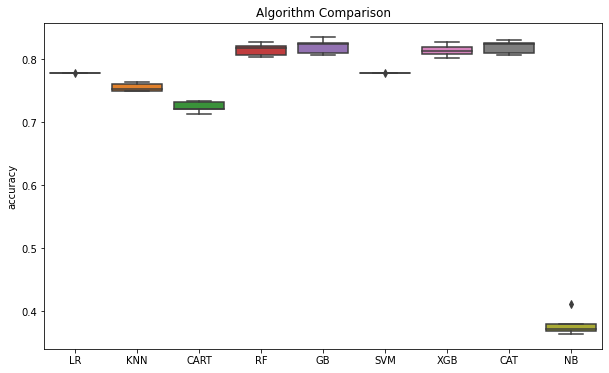

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=results)
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('accuracy')
plt.show()